In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score

from sklearn.cluster import KMeans
from sklearn import preprocessing

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [4]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


Выполните стандартизацию для набора данных вина (wine_data), используя только базовый python, numpy и pandas (вообще не используя StandardScaler и sklearn). Реализация функции (или класса), которая может получать набор данных в качестве входных данных и возвращать стандартизированный набор данных в качестве выходных данных, предпочтительна, но не обязательна.

Сравните свои результаты (вывод) с StandardScaler.

ПРИМЕЧАНИЕ:

1 балл за функциональную версию, 2 балла за реализацию масштабирования в качестве класса, совместимого с конвейером sklearn.
Максимум за упражнение 2 балла.

### Simple version (1 point)

In [5]:
# 1 point
#(X - np.mean(X)) / (np.std(X))

def scale(X):
    scaled_X = X.copy()
    col_X =scaled_X.columns
    for i in col_X:
        mean = np.mean(scaled_X[i])
        std = np.std(scaled_X[i])
        scaled_X[i] = (scaled_X[i] - mean) / std
    return scaled_X
       
    # your code here

In [6]:
scale(wine_data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


Compare you results (output) with StandardScaler.

In [7]:
cols = wine_data.columns

scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)
scaled_feat = pd.DataFrame(wine_data_scaled, columns = cols)
scaled_feat

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [8]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

### Pipeline Version (2 points)

In [9]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):
   

    def __init__(self, columns=None, copy = True, with_mean = True, with_std = True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
        
    def fit(self, X, y = None):
        if self.columns is None:
            self.columns = list(X.columns)
        
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y = None, copy = None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns = self.columns)
        X_notScaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_notScaled, X_scaled], axis = 1)[init_col_order]
        # your code here



In [10]:
u_inputs = wine_data.iloc[:,:-1]
u_inputs.columns.values




array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines'], dtype=object)

In [11]:
columns_out = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']

In [12]:
columns_to_scale = [col for col in u_inputs.columns.values if col not in columns_out]


In [13]:
scaler = CustomScaler(columns_to_scale)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [14]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data));

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [15]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[ -2.95767037,  -0.67219621],
       [-20.73949933,   0.51315539],
       [-19.20715901,   0.98490086],
       ...,
       [ 16.33415896,   3.67634758],
       [  2.4966369 ,   3.09038622],
       [-12.5286905 ,   3.79701823]])

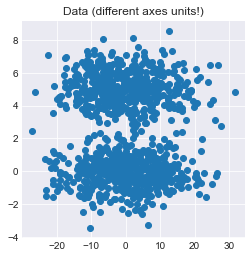

In [16]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

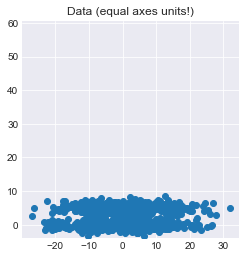

In [17]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

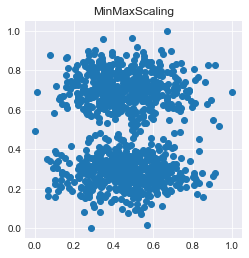

In [18]:
## your code
scaler = MinMaxScaler()
MinMaxscal = scaler.fit_transform(data)
plot_scatter(MinMaxscal[:, 0], MinMaxscal[:, 1], auto_scaled=False , title='MinMaxScaling')

### StandardScaler (0.5 point)

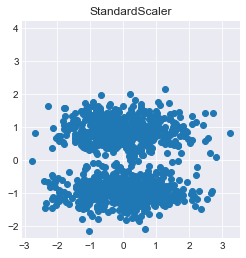

In [19]:
## your code
scaler = StandardScaler()
StandScal = scaler.fit_transform(data)
plot_scatter(StandScal[:, 0], StandScal[:, 1], auto_scaled=False , title='StandardScaler')

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


Проиллюстрируйте влияние масштабирования на базовый алгоритм кластеризации на основе расстояния K-means, используя данные, сгенерированные выше.

ПРИМЕЧАНИЕ: в принципе, здесь вам не нужно понимать алгоритм K-средних, вам просто нужно:

1) запустите алгоритм (с k=2, k - количество кластеров/классов) на немасштабированных данных

2) запустите алгоритм (с k=2) на масштабированных данных

3) результаты построения графика: выделите разные кластеры разными цветами.

Вы можете использовать этот вопрос в качестве подсказки, но я рекомендую вам отображать результаты с помощью plot_scatter с equal_scaled=True: это может помочь вам интуитивно понять причины такого влияния масштабирования.

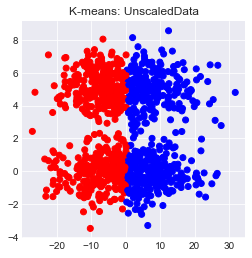

In [20]:
## your code
k = KMeans(2)
#unscaled data
unscaled = k.fit_predict(data)
plot_scatter(data[:,0], data[:,1], auto_scaled=True, title='K-means: UnscaledData',  clusters=unscaled)



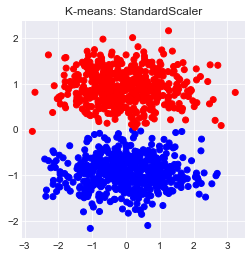

In [21]:
#StandardScaler
stand_scal_pre = preprocessing.StandardScaler()
stand_scal = stand_scal_pre.fit_transform(data)
stand_scal_km = k.fit_predict(stand_scal)
plot_scatter(stand_scal[:,0], stand_scal[:,1], auto_scaled=True, title='K-means: StandardScaler',  clusters=stand_scal_km)

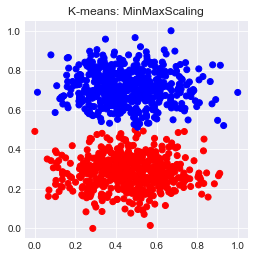

In [22]:
#MinMaxScaling
minmax_pre = preprocessing.MinMaxScaler()
minmax_scal = minmax_pre.fit_transform(data)
minmax_scal_km = k.fit_predict(minmax_scal)
plot_scatter(minmax_scal[:,0], minmax_scal[:,1], auto_scaled=True, title='K-means: MinMaxScaling',  clusters=minmax_scal_km)


## Exercise  3 - Preprocessing Pipeline (2 points)

In [23]:
wine_train, wine_val, wine_labels_train, wine_labels_val = train_test_split(wine_data, wine_labels, 
                                                                            test_size=0.3, random_state=42)

Train model (for example, `LogisticRegression(solver='liblinear', penalty='l1')` on raw `wine_train` data; then train same model after data scaling; then add feature selection (and train model again on scaled data). For each experiment all required preprocessing steps (if any) should be wrapped into sklearn pipeline.

Measure `accuracy` of all 3 approaches on `wine_val` dataset. Describe and explain results.

Обучите модель (например, LogisticRegression(solver='liblinear', penalty='l1') на необработанных данных wine_train; затем обучите ту же модель после масштабирования данных; затем добавьте выделение объектов (и снова обучите модель на масштабированных данных). Для каждого эксперимента все необходимые этапы предварительной обработки (если таковые имеются) должны быть включены в конвейер sklearn.

Измерьте точность всех 3 подходов в наборе данных wine_val. Опишите и объясните результаты.

In [24]:
## your code
log_reg = LogisticRegression(solver='liblinear', penalty='l1')
log_reg.fit(wine_train, wine_labels_train)

r_f = RandomForestClassifier(random_state=42)
selector = SelectFromModel(r_f).fit(wine_data, wine_labels)
wd_sel = selector.transform(wine_data)
print(wine_data.columns[selector.get_support()])
print(f'Shape - data: {wine_data.shape}')
print(f'Shape - selection: {wd_sel.shape}')


Index(['alcohol', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Shape - data: (178, 13)
Shape - selection: (178, 6)


In [25]:
pipe_baseline = make_pipeline(StandardScaler(), log_reg)
pipe_selection = make_pipeline(StandardScaler(), SelectFromModel(r_f), log_reg) # fix to select only once
                     
wine_val_1 = cross_val_score(log_reg, wine_val, wine_labels_val, scoring='accuracy', cv=5).mean()
wine_val_2 = cross_val_score(pipe_baseline, wine_val, wine_labels_val,scoring='accuracy', cv=5).mean()
wine_val_3 = cross_val_score(pipe_selection, wine_val, wine_labels_val,scoring='accuracy', cv=5).mean()
print('Result on original data: {:f}'.format(wine_val_1))
print('Result on StandardScaler data: {:f}'.format(wine_val_2))
print('Result after selection {:f}'.format(wine_val_3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Result on original data: 0.945455
Result on StandardScaler data: 0.981818
Result after selection 0.961818


Лучше применять масштабирование или масштабирование с выделением объектов,тк масштабирование придало более высокую  точность измерениям.

Точность выше, чем у необработанных данных.

## Exercise 4 - manual PCA (5 points)
The task is to solve PCA as an optimization problem, without explicitly doing eigen value decomposition.
In the most general setting PCA is minimization of reconstruction error of a projection of given rank $q$

$$\min_{\mu, \lambda_1,\ldots, \lambda_n, \mathbf{V}_q} \sum_{i=1}^n ||x_i - \mu - \mathbf{V}_q \lambda_i||^2$$

With a number of steps that can be found here https://stats.stackexchange.com/a/10260 this task transforms to
 $$\max_{u_i} \sum_{i=1}^q u_i^T \mathbf{S} u_i$$
 where $\mathbf{S}$ is the sample covariance matrix (after standartization) and $u_1, \ldots, u_q$ are the $q$ are orthonormal columns in $\mathbf{V}_q$.
 Let us solve this optimization problem with `scipy.optimize` library.
 
 Additional 2 point are given for visualization of the results.

Задача состоит в том, чтобы решить PCA как задачу оптимизации, явно не выполняя декомпозицию собственных значений. 
В наиболее общем случае PCA - это минимизация ошибки восстановления проекции заданного ранга 𝑞

С рядом шагов, которые можно найти здесь https://stats.stackexchange.com/a/10260 эта задача преобразуется в

где 𝐒 - выборочная ковариационная матрица (после стандартизации), а 𝑢1,...,𝑢𝑞 - ортонормированные столбцы в 𝐕𝑞 . Давайте решим эту проблему оптимизации с помощью библиотеки scipy.optimize.

Дополнительные 2 балла даются за визуализацию результатов.


### PCA (3 points)

In [26]:
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

Find a covariance matrix of standartized data and assing it to S.

In [27]:
## your code
scaler = StandardScaler()
StandScal = scaler.fit_transform(wine_data)
StandScal



array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Расчет ковариационной матрицы

In [28]:
#S = ## your code
S = np.cov(StandScal.T)

In [29]:
print("cov_matrix shape:",S.shape)
print('covariance matrix',S)


cov_matrix shape: (13, 13)
covariance matrix [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70

If your code is correct, the following assert should be Ok.

In [30]:
np.linalg.norm(S)

5.787241159764733

In [31]:
assert np.allclose(np.linalg.norm(S), 5.787241159764733)

In [32]:
from scipy.optimize import minimize

def objective(x):
    # your code: write objective of the problem (don't forget that scipy does min while we need max)
    return 1 - x.T@S@x

def norm_constraint(x):
    # your code: constaraint norm of x to be 1, function should return 0 if constraint holds
    # ваш код: установите норму x равной 1, функция должна возвращать 0, если выполняется ограничение
    
    
        return 1 - x.T @ x
        if np.linalg.norm(x) == 1:
            return 0
     
        
        

con1 = {'type': 'eq', 'fun': norm_constraint}

x0 = np.ones(wine_data.shape[1])
# your code: initial vector to start optimization

sol = minimize(objective, 
               x0, 
               constraints = [con1]
              )
x0 = sol.x

Hurray! We have first vector! Let's do another one.

In [33]:
def orthogonality_constraint(x):
    if x.T @ x0 == 0:
        return 0
    else:
        return - x.T @ x0
    # your code: x should be orthogonal to x0, function should return 0 if constraint holds

con2 = {'type': 'eq', 'fun': orthogonality_constraint}

x1 = np.ones(wine_data.shape[1])
#your code: initial vector to start optimization


sol = minimize(objective, 
               x1, 
               constraints = [con1,con2]
              )

x1 = sol.x

If your solution is correct, the following asserts should be Ok.

In [34]:
assert np.allclose(x0@S@x0, 4.732436977583595)
assert np.allclose(x1@S@x1, 2.5110809296451233)

### Visualization (2 points)

Visualize the points after applying custom dimension reduction with 2 components.

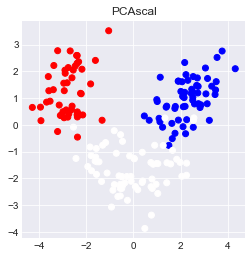

In [35]:
scaler = StandardScaler()
wd_scal= scaler.fit_transform(wine_data)
#plot_scatter(StandScal[:, 0], StandScal[:, 1], auto_scaled=False , title='StandardScaler')
x = wd_scal @ x0
y = wd_scal @ x1
plot_scatter(x,y,auto_scaled=True , title='PCAscal',clusters=wine_labels)

## Exercise 5 - Boruta (3 points)

Let us classify handwritten digits 0, 1 and 2. 
To make task not so easy the images are binarized (no shadows of gray present) as it happens with xerocopied documents.

Let us also find out to which parts of an image there's no need to look in order to clasify three digits of interest.

Давайте классифицируем написанные от руки цифры 0, 1 и 2. Чтобы упростить задачу, изображения бинаризованы (отсутствуют тени серого цвета), как это происходит с ксерокопированными документами.

Давайте также выясним, на какие части изображения нет необходимости смотреть, чтобы классифицировать три интересующие цифры

In [36]:
X, y = load_digits(n_class=3, return_X_y=True, as_frame=True)
X = (X>10).astype(int)

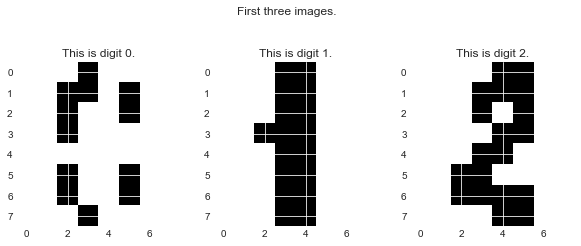

In [37]:
f, ax = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    ax[i].imshow(X.iloc[i].values.reshape(8,8))
    ax[i].set_title(f"This is digit {y[i]}.")
plt.suptitle("First three images.")
plt.show()

Split data into train and test, let test size be 30% of the dataset and fix random state to 42:

Разделите данные на обучающие и тестовые, пусть размер теста составляет 30% от набора данных и зафиксируйте случайное состояние на 42:

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
## your code here

In [39]:
assert y_val.shape[0] == 162
assert y_val.sum() == 169

Fit a RandomForestClassifier with max_depth=13 and evaluate it's performance:

In [40]:
clf = RandomForestClassifier(max_depth=13)

# your code here
y_true = clf.fit(X_train, y_train).predict(X_val)
y_pred = y_val
print(classification_report(y_true,y_pred))

acc = recall_score(y_pred,y_true,average = 'micro')
#acc = f1_score(y_true,y_pred,average = 'micro')

# your code here
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.98      0.97      0.97        58
           2       0.96      0.98      0.97        55

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162

0.9814814814814815


In [41]:
acc = f1_score(y_true,y_pred,average = 'micro')
acc

0.9814814814814815

In [42]:
assert acc > 0.98

Now we will use Boruta to find redundand pixels. If the package is not installed in your system, uncomment and run the following cell.

Теперь мы будем использовать Boruta для поиска избыточных пикселей. Если пакет не установлен в вашей системе, раскомментируйте и запустите следующую ячейку.

In [ ]:
#! pip install boruta

In [45]:
from boruta import BorutaPy

feat_selector = BorutaPy(RandomForestClassifier(max_depth=13), 
                         n_estimators='auto', 
                         verbose=0, 
                         max_iter=100,
                         random_state=42)

# your code here: do run the boruta
#feat_selector.fit(X_train, y_train)
feat_selector.fit(np.array(X_train), np.array(y_train))

BorutaPy(estimator=RandomForestClassifier(max_depth=13, n_estimators=62,
                                          random_state=RandomState(MT19937) at 0x1A8F6CC4640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1A8F6CC4640)

Let us print redundant pixels as a mask. Does the result looks similar to mine (or to Among us chracters)? 

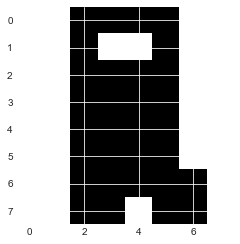

In [46]:
mask = np.array(feat_selector.support_).reshape(8,8)
plt.imshow(mask);

At the end let us redo  classification but only with selected features

В конце давайте повторим классификацию, но только с выбранными функциями

In [67]:
# clf = RandomForestClassifier(max_depth=13)

# acc = # 
# print(acc)


y_true = clf.fit(X_train.iloc[:,mask.reshape(1, -1)[0]],y_train).predict(X_val.iloc[:,mask.reshape(1, -1)[0]])
y_pred = y_val

acc = f1_score(y_true,y_pred,average='micro')


print(acc)

0.9938271604938271


In [57]:
# acc = recall_score(y_pred,y_true,average = 'micro')
# acc

0.9938271604938271

In [68]:
assert acc > 0.99

# Materials & References

1. General article about feature engineering and selection (main reference):
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_english/topic06_features_regression/topic6_feature_engineering_feature_selection.ipynb

2. Feature engineering/preprocessing, using scikit-learn API (great code examples, but really brief explanation):    
https://scikit-learn.org/stable/modules/preprocessing

3. Feature scaling/normalization:     
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

4. Log Transform/power transform:    
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

6. Missing values preprocessing using scikit-learn API (great code examples, great explanation):    
https://scikit-learn.org/stable/modules/impute.html

7. Feature selection scikit-learn API (great code examples, great explanation):   
https://scikit-learn.org/stable/modules/feature_selection.html

8. Melbourne housing dataset source:    
https://www.kaggle.com/anthonypino/melbourne-housing-market